## YYC Bike Counter
### Eco-Counter
has a private API that can be figured out by reading the AJAX requests performed on each of the counter pages. The data in question is owned by the City of Calgary. The counts are posted once a day normally between 5:00 and 6:00 AM MST, so the counts are not live.

API Breakdown:

Individual Data Sets:
http://www.eco-public.com/api/cw6Xk4jW4X4R/data/periode/[ID]/?begin=YYYYMMDD&endYYYYMMDD&step=[NUMBER]


### Environment Canada's 
data is available as hourly readings (a month's worth), or as daily readings (a year's worth). I use Station 50430 (the Airport)

Hourly Data:
http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2016&Month=06&Day=07&submit=Download+Data&timeframe=1

Daily Data:
http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Prov=AB&dlyRange=2012-07-09&7C2016-06-07&Year=2016&Month=


In [54]:
from urllib.request import urlretrieve
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')


## URL(s)

In [55]:

YYCBike_URL = 'http://www.eco-public.com/api/cw6Xk4jW4X4R/data/periode/102020207/?begin=20190101&end=20190503&step=3'

YYCWeather_URL = 'http://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=50430&Year=2019&Month=04&Day=30&submit=Download+Data&timeframe=1'


### Get Data

In [62]:
def get_YYCBike_data(filename='YYCbikeCount.json', url=YYCBike_URL,
                     force_download=False):
    """Download and cache the fremont data

    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data

    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_json(filename, orient='columns')

    try:
        data.index = pd.to_datetime(data.date, format='%Y-%m-%d %H:%M:%S')
    except TypeError:
        data.index = pd.to_datetime(data.date)

    return data

In [63]:
def get_YYCWeather_data(filename='YYCWeather.csv', url=YYCWeather_URL,
                     force_download=False):
    """Download and cache the fremont data

    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force redownload of data

    Returns
    -------
    data : pandas.DataFrame
        The fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv(filename,skiprows=16,  index_col='Date/Time')

    try:
        data.index = pd.to_datetime(data.index, format='%Y-%m-%d %H:%M')
    except TypeError:
        data.index = pd.to_datetime(data.index)

    return data

### Display Data

In [64]:
# Load the first sheet of the JSON file into a data frame
Bikedata = get_YYCBike_data()

# View the first ten rows
Bikedata.head(10)

,comptage,date,timestamp
date,,,
2019-01-01 00:00:00,2.0,2019-01-01 00:00:00,2018-12-31 23:00:00
2019-01-01 01:00:00,2.0,2019-01-01 01:00:00,2019-01-01 00:00:00
2019-01-01 02:00:00,0.0,2019-01-01 02:00:00,2019-01-01 01:00:00
2019-01-01 03:00:00,0.0,2019-01-01 03:00:00,2019-01-01 02:00:00
2019-01-01 04:00:00,0.0,2019-01-01 04:00:00,2019-01-01 03:00:00
2019-01-01 05:00:00,0.0,2019-01-01 05:00:00,2019-01-01 04:00:00
2019-01-01 06:00:00,0.0,2019-01-01 06:00:00,2019-01-01 05:00:00
2019-01-01 07:00:00,0.0,2019-01-01 07:00:00,2019-01-01 06:00:00
2019-01-01 08:00:00,0.0,2019-01-01 08:00:00,2019-01-01 07:00:00


In [65]:
# Dispaly Info
Bikedata.info

<bound method DataFrame.info of                      comptage                date           timestamp
date                                                                 
2019-01-01 00:00:00       2.0 2019-01-01 00:00:00 2018-12-31 23:00:00
2019-01-01 01:00:00       2.0 2019-01-01 01:00:00 2019-01-01 00:00:00
2019-01-01 02:00:00       0.0 2019-01-01 02:00:00 2019-01-01 01:00:00
2019-01-01 03:00:00       0.0 2019-01-01 03:00:00 2019-01-01 02:00:00
2019-01-01 04:00:00       0.0 2019-01-01 04:00:00 2019-01-01 03:00:00
2019-01-01 05:00:00       0.0 2019-01-01 05:00:00 2019-01-01 04:00:00
2019-01-01 06:00:00       0.0 2019-01-01 06:00:00 2019-01-01 05:00:00
2019-01-01 07:00:00       0.0 2019-01-01 07:00:00 2019-01-01 06:00:00
2019-01-01 08:00:00       0.0 2019-01-01 08:00:00 2019-01-01 07:00:00
2019-01-01 09:00:00       0.0 2019-01-01 09:00:00 2019-01-01 08:00:00
2019-01-01 10:00:00       0.0 2019-01-01 10:00:00 2019-01-01 09:00:00
2019-01-01 11:00:00       0.0 2019-01-01 11:00:00 2019-01-

## Display data

In [66]:
# Load the first sheet of the JSON file into a data frame

Weatehrdata = get_YYCWeather_data()

# View the first ten rows
Weatehrdata.head(10)

,Year,Month,Day,Time,Temp (°C),Temp Flag,Dew Point Temp (°C),Dew Point Temp Flag,Rel Hum (%),Rel Hum Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00,2019,4,1,00:00,1.9,NaN,-0.1,NaN,87.0,NaN,...,NaN,16.1,NaN,89.50,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:00:00,2019,4,1,01:00,1.9,NaN,-0.5,NaN,84.0,NaN,...,NaN,16.1,NaN,89.52,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 02:00:00,2019,4,1,02:00,1.2,NaN,-1.6,NaN,82.0,NaN,...,NaN,16.1,NaN,89.50,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
2019-04-01 03:00:00,2019,4,1,03:00,0.0,NaN,-2.6,NaN,83.0,NaN,...,NaN,24.1,NaN,89.52,NaN,NaN,NaN,-6.0,NaN,NaN
2019-04-01 04:00:00,2019,4,1,04:00,1.0,NaN,-2.1,NaN,80.0,NaN,...,NaN,16.1,NaN,89.51,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 05:00:00,2019,4,1,05:00,0.7,NaN,-2.4,NaN,80.0,NaN,...,NaN,24.1,NaN,89.52,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy
2019-04-01 06:00:00,2019,4,1,06:00,0.5,NaN,-2.1,NaN,83.0,NaN,...,NaN,16.1,NaN,89.55,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 07:00:00,2019,4,1,07:00,0.8,NaN,-1.7,NaN,83.0,NaN,...,NaN,32.2,NaN,89.55,NaN,NaN,NaN,NaN,NaN,Snow
2019-04-01 08:00:00,2019,4,1,08:00,1.2,NaN,-1.9,NaN,80.0,NaN,...,NaN,48.3,NaN,89.57,NaN,NaN,NaN,NaN,NaN,Mostly Cloudy


In [67]:
Weatehrdata.info

<bound method DataFrame.info of                      Year  Month  Day   Time  Temp (°C)  Temp Flag  \
Date/Time                                                            
2019-04-01 00:00:00  2019      4    1  00:00        1.9        NaN   
2019-04-01 01:00:00  2019      4    1  01:00        1.9        NaN   
2019-04-01 02:00:00  2019      4    1  02:00        1.2        NaN   
2019-04-01 03:00:00  2019      4    1  03:00        0.0        NaN   
2019-04-01 04:00:00  2019      4    1  04:00        1.0        NaN   
2019-04-01 05:00:00  2019      4    1  05:00        0.7        NaN   
2019-04-01 06:00:00  2019      4    1  06:00        0.5        NaN   
2019-04-01 07:00:00  2019      4    1  07:00        0.8        NaN   
2019-04-01 08:00:00  2019      4    1  08:00        1.2        NaN   
2019-04-01 09:00:00  2019      4    1  09:00        3.1        NaN   
2019-04-01 10:00:00  2019      4    1  10:00        4.3        NaN   
2019-04-01 11:00:00  2019      4    1  11:00        5.4   

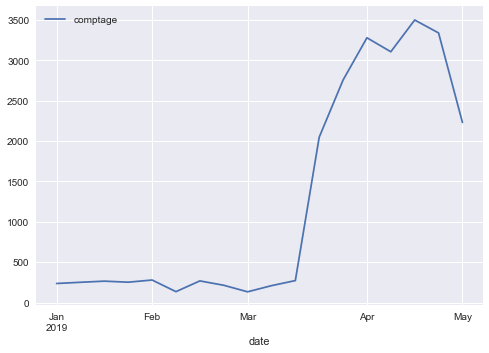

In [79]:
Bikedata.resample('W').sum().plot();

In [80]:
Weatehrdata = Weatehrdata.loc[:,["Year","Month","Day","Time", "Temp (°C)"]]

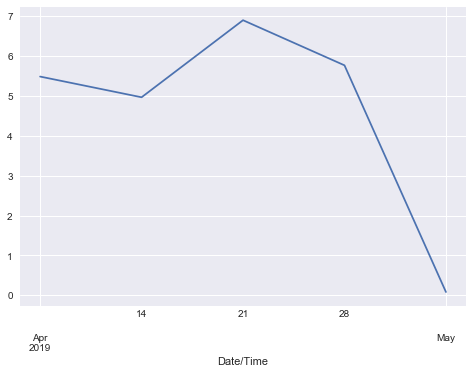

In [81]:
Weatehrdata["Temp (°C)"].resample('W').mean().plot()

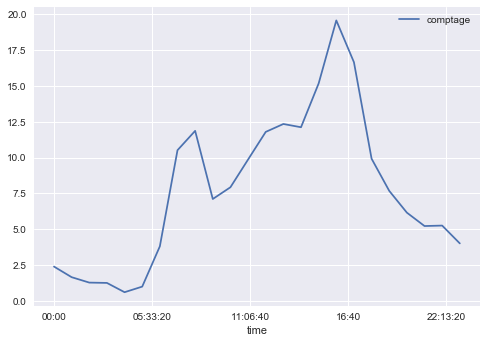

In [82]:
Bikedata.groupby(Bikedata.index.time).mean().plot();

In [83]:
Bikedata = get_YYCBike_data()
Bikedata

,comptage,date,timestamp
date,,,
2018-05-01 00:00:00,3.0,2018-05-01 00:00:00,2018-04-30 22:00:00
2018-05-01 01:00:00,2.0,2018-05-01 01:00:00,2018-04-30 23:00:00
2018-05-01 02:00:00,0.0,2018-05-01 02:00:00,2018-05-01 00:00:00
2018-05-01 03:00:00,0.0,2018-05-01 03:00:00,2018-05-01 01:00:00
2018-05-01 04:00:00,1.0,2018-05-01 04:00:00,2018-05-01 02:00:00
2018-05-01 05:00:00,5.0,2018-05-01 05:00:00,2018-05-01 03:00:00
2018-05-01 06:00:00,19.0,2018-05-01 06:00:00,2018-05-01 04:00:00
2018-05-01 07:00:00,50.0,2018-05-01 07:00:00,2018-05-01 05:00:00
2018-05-01 08:00:00,31.0,2018-05-01 08:00:00,2018-05-01 06:00:00


In [84]:
pivoted = Bikedata.pivot_table('comptage', index=Bikedata.index.time, columns=Bikedata.index.date)
pivoted.iloc[:5, :5]

,2018-05-01,2018-05-02,2018-05-03,2018-05-04,2018-05-05
00:00:00,3.0,4.0,4.0,28.0,20.0
01:00:00,2.0,1.0,4.0,4.0,17.0
02:00:00,0.0,2.0,0.0,1.0,9.0
03:00:00,0.0,3.0,1.0,2.0,4.0
04:00:00,1.0,3.0,3.0,0.0,2.0


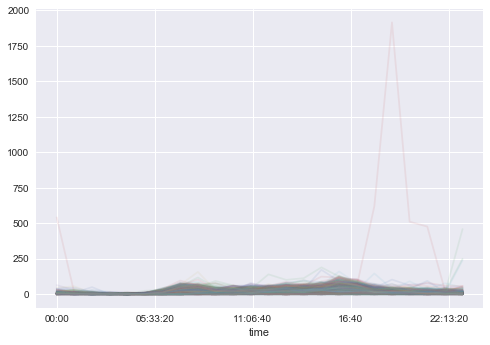

In [85]:
pivoted.plot(legend=False, alpha=0.1);

## Unsupervised Data Analysis

In [31]:
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

### Principal Component Analysis

In [32]:
X = pivoted.fillna(0).T.values
X.shape

(123, 24)

In [33]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(123, 2)

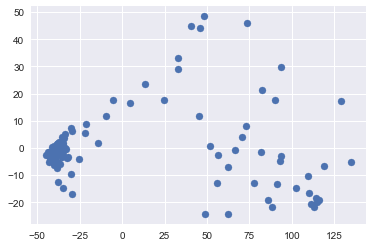

In [34]:
plt.scatter(X2[:, 0], X2[:, 1]);

### Unsupervised Clusering

In [35]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

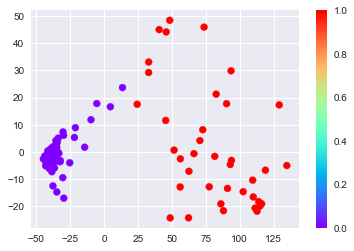

In [36]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

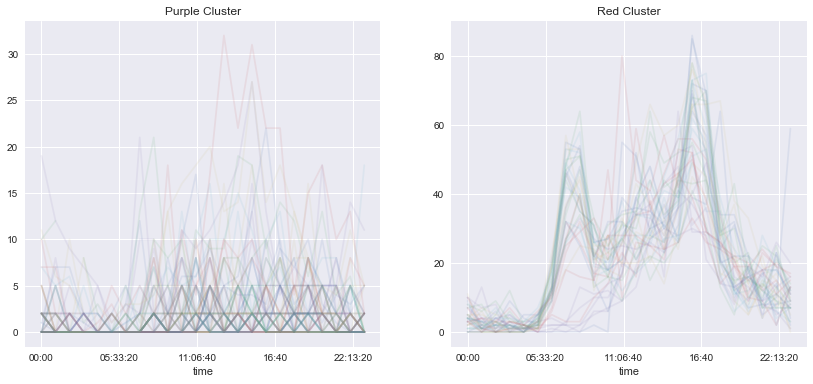

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [38]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

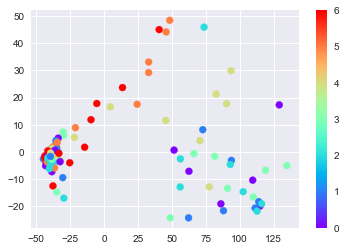

In [39]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## Analysizing Outliers

In [40]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25',
               '2019-03-26', '2019-03-27', '2019-03-28', '2019-03-29',
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-08', '2019-04-09', '2019-04-10',
               '2019-04-11', '2019-04-12', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-22', '2019-04-23',
               '2019-04-24', '2019-04-25', '2019-04-26', '2019-04-29',
               '2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03'],
              dtype='datetime64[ns]', freq=None)